In [1]:
zip_path = '/content/drive/My\ Drive/BCML/datasets/DeepLearning/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [10]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

# **Adding Image Augmentation**

In [3]:
dataset_dir = '/content/'
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,zoom_range=[0.7,1.0],brightness_range=[0.7,0.1])
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [4]:
train_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_augmented_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


# **Adding Convolutional Layer (Filter 32, 64, and 128)**

In [5]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())

model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [6]:
history=model3.fit_generator(train_augmented_iterator, steps_per_epoch=len(train_augmented_iterator), validation_data=test_augmented_iterator, validation_steps=len(test_augmented_iterator), epochs=75)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
100/100 [==============================] - 145s 1s/step - loss: 0.6953 - accuracy: 0.5344 - val_loss: 0.6536 - val_accuracy: 0.6177
Epoch 2/75
100/100 [==============================] - 147s 1s/step - loss: 0.6721 - accuracy: 0.5937 - val_loss: 0.6262 - val_accuracy: 0.6461
Epoch 3/75
100/100 [==============================] - 146s 1s/step - loss: 0.6569 - accuracy: 0.6200 - val_loss: 0.6254 - val_accuracy: 0.6474
Epoch 4/75
100/100 [==============================] - 146s 1s/step - loss: 0.6493 - accuracy: 0.6321 - val_loss: 0.6513 - val_accuracy: 0.6354
Epoch 5/75
100/100 [==============================] - 146s 1s/step - loss: 0.6481 - accuracy: 0.6317 - val_loss: 0.7314 - val_accuracy: 0.5861
Epoch 6/75
100/100 [==============================] - 145s 1s/step - loss: 0.6422 - accuracy: 0.6422 - val_loss: 0.8151 - val_accuracy: 0.5808
Epoch 7/75
100/100 [==============================] - 145s 1s/step

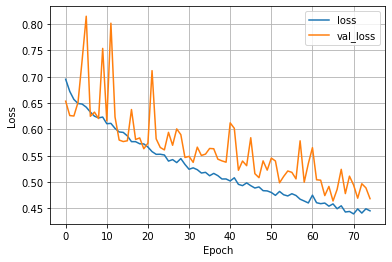

In [12]:
plot_loss(history)

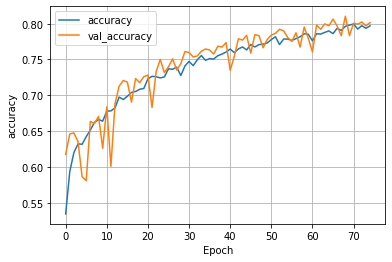

In [13]:
plot_accuracy(history)

# **Kesimpulan**

grafik base 

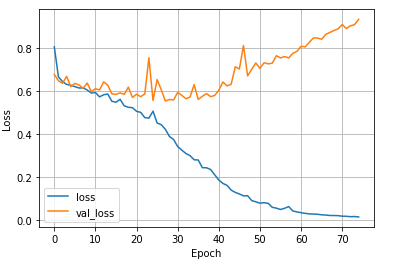

dalam grafik base model itu tidak menunjukan baik karena val_loss terus naik dan tidak menunjukan penurunan sehingga data banyak kesalahan. 

sedangkan untuk grafik model yang semakin dalam dengan 3 layer ini menunjukan suatu bentuk yang baik dimana loss dan val_loss menurun secara berbarengan tetapi val_loss tetap di atas grafik loss ini menunjukan data kita tidak under fitting ataupun overfit.